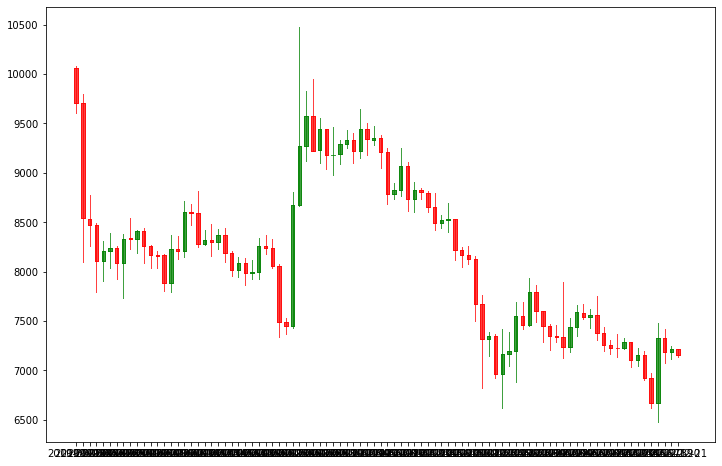

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

import mpl_finance
import matplotlib.ticker as ticker

df = pd.read_csv('90d.csv')
df

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)

day_list = []
name_list = []
for i, ts in enumerate(df['MTS']):
    day = datetime.datetime.fromtimestamp(ts / 1e3)
    day_list.append(i)
    name_list.append(day.strftime('%Y-%m-%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

mpl_finance.candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], width=0.5, colorup='g', colordown='r')

plt.show()


In [7]:
print(df.tail())

yesterday = df.iloc[-2]
today_open = yesterday['Close']
yesterday_high = yesterday['High']
yesterday_low = yesterday['Low']
k = 0.5
volatility = (yesterday_high - yesterday_low) * k
long_target = today_open + volatility 
short_target = today_open - volatility

print('Volatitlity: ', volatility)
print('Open price:', today_open)
print('long target:', long_target)
print('short target:', short_target)

    Unnamed: 0            MTS         Open        Close    High     Low  \
85          85  1576540800000  6926.800000  6667.100000  6972.0  6620.0   
86          86  1576627200000  6667.068103  7326.200000  7482.2  6477.0   
87          87  1576713600000  7326.200000  7181.800000  7417.1  7079.7   
88          88  1576800000000  7181.770199  7212.925908  7249.0  7116.8   
89          89  1576886400000  7213.000000  7154.500000  7215.1  7136.5   

          Volume  
85  12656.313323  
86  13752.710168  
87   5430.843086  
88   5703.239879  
89   1273.629259  
Volatitlity:  66.09999999999991
Open price: 7212.92590776
long target: 7279.02590776
short target: 7146.82590776
